Cleaning Time Series Data : Time Series Talk

 https://www.youtube.com/watch?v=7_Js8h709Dw

In [122]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main

# Read the Data

In [123]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [124]:
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))

In [125]:
opencsv

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-30,0.0627,2.442132e+02,NaN,NaN,1.303900,0.011569,0.008870,84.992340,40.332348,18.262423,...,19.209999,115.489998,17.580000,68.869255,55.121548,325.0,374.0,NaN,NaN,3.561700e+06
2010-08-06,0.0623,3.521612e+02,NaN,8585.3,1.318131,0.011651,0.008840,86.626381,41.168751,18.516254,...,19.184999,117.839996,18.070000,68.830765,55.399757,359.0,422.0,NaN,NaN,3.637650e+06
2010-08-13,0.0645,3.521612e+02,NaN,8626.1,1.282989,0.011618,0.009060,83.481644,39.372696,18.290625,...,19.305000,118.739998,17.740000,70.336624,55.541592,516.0,609.0,NaN,NaN,3.707650e+06
2010-08-20,0.0655,5.117735e+02,NaN,8631.6,1.280803,0.011717,0.009150,82.880470,39.548763,18.001530,...,19.195000,119.970001,17.590000,72.915215,55.690178,423.0,458.0,NaN,NaN,3.768900e+06
2010-08-27,0.0650,6.233870e+02,NaN,8579.8,1.270648,0.011856,0.009330,82.364067,38.800415,17.973328,...,19.049999,121.010002,18.700001,72.440773,55.636154,294.0,323.0,NaN,NaN,3.839400e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,60324.3000,8.367526e+13,8.362849e+09,20905.5,1.070847,0.006223,0.005808,544.219971,479.109985,50.869999,...,95.190002,215.009995,26.570000,91.185036,71.610153,593984.0,562499.0,3687.0,17.0,1.971838e+07
2024-07-05,56646.2400,8.008248e+13,1.707263e+10,20947.5,1.079331,0.006187,0.005730,554.640015,496.160004,51.410000,...,95.334999,220.929993,28.480000,92.252472,72.179413,490537.0,510689.0,4547.0,28.0,1.972142e+07
2024-07-12,57913.6800,7.949520e+13,7.362339e+09,NaN,1.087276,0.006321,0.005814,559.989990,494.820007,52.160000,...,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0,4441.0,29.0,1.972469e+07


In [126]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='red')

    for year in range(2010, 2025):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

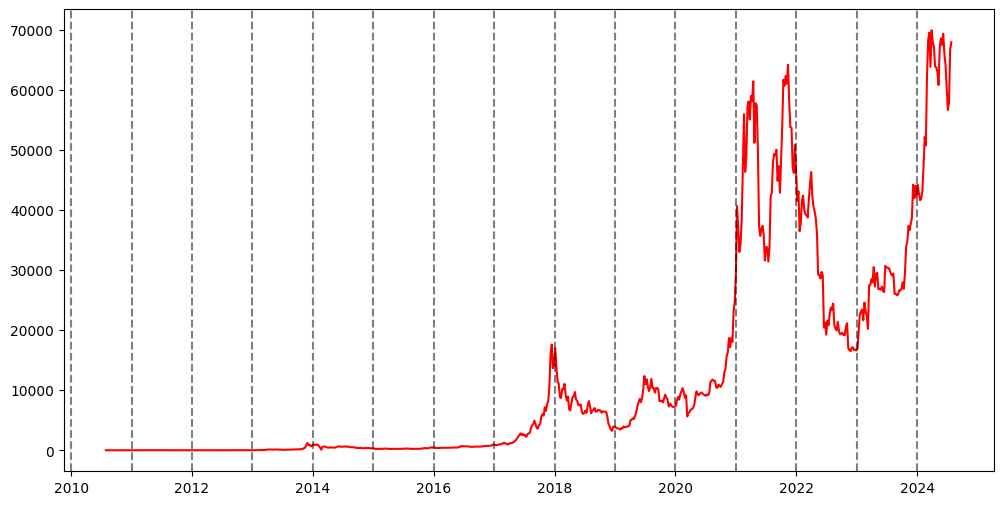

In [127]:
BTC_series = opencsv.BTC_USD
plot_series(BTC_series)

**A VAR training model workflow**

![image info](./VAR_Training_Model_Worflow.png)

source: https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/vector-autoregression-python

# ADF test

In [128]:
# Individual Test

from statsmodels.tsa.stattools import adfuller

# If p-value is not less than .05, we reject the null hypothesis. This means the time series is stationary.

# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

# HA: The time series is stationary.

#perform augmented Dickey-Fuller test
adfuller(BTC_series)

(0.17467712137684316,
 0.9708050065963536,
 16,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 12738.987091683279)

In [129]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}
stationary = []
non_stationary = []

# Loop through each column in the DataFrame
for column in opencsv.columns:
    # Perform ADF test
    result = adfuller(opencsv[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       stationary.append(column)
    else:
        non_stationary.append(column) 

In [130]:
p_values

{'BTC_USD': 0.9708050065963536,
 'Mining_Difficulty': 1.0,
 'USD_OnChain_Volume': 0.7084242625199072,
 'M2_Liquidity': 0.8934649836522045,
 'EUR_USD': 0.4583753729057509,
 'JPY_USD': 0.8694952395919189,
 'JPY_EUR': 0.0,
 'SPY': 0.9941782907046707,
 'QQQ': 0.995612645456534,
 'EXSA': 0.9271523947821221,
 'JPXN': 0.7672465265279917,
 'IWDA': 0.9957573709247572,
 'GLD': 0.8902397750782358,
 'SLV': 0.28404060660039665,
 'TLT': 0.3810438826770546,
 'BND': 0.47978486424027267,
 'Nr_Transactions': 0.9180455838704737,
 'Nr_Addresses': 0.5619342065814182,
 'BTC_PageViews': 8.812064972736989e-05,
 'Crypto_PageViews': 0.014076228973073434,
 'BTC_Supply': 9.116734228480277e-06}

In [134]:
stationary

['JPY_EUR', 'BTC_PageViews', 'Crypto_PageViews', 'BTC_Supply']

In [133]:
non_stationary

['BTC_USD',
 'Mining_Difficulty',
 'USD_OnChain_Volume',
 'M2_Liquidity',
 'EUR_USD',
 'JPY_USD',
 'SPY',
 'QQQ',
 'EXSA',
 'JPXN',
 'IWDA',
 'GLD',
 'SLV',
 'TLT',
 'BND',
 'Nr_Transactions',
 'Nr_Addresses']

In [135]:
modify_df = opencsv.copy()
modify_df.drop(columns=stationary, inplace=True)
modify_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-07-30,0.0627,2.442132e+02,NaN,NaN,1.303900,0.011569,84.992340,40.332348,18.262423,32.519962,19.209999,115.489998,17.580000,68.869255,55.121548,325.0,374.0
2010-08-06,0.0623,3.521612e+02,NaN,8585.3,1.318131,0.011651,86.626381,41.168751,18.516254,33.171909,19.184999,117.839996,18.070000,68.830765,55.399757,359.0,422.0
2010-08-13,0.0645,3.521612e+02,NaN,8626.1,1.282989,0.011618,83.481644,39.372696,18.290625,31.976667,19.305000,118.739998,17.740000,70.336624,55.541592,516.0,609.0
2010-08-20,0.0655,5.117735e+02,NaN,8631.6,1.280803,0.011717,82.880470,39.548763,18.001530,32.240543,19.195000,119.970001,17.590000,72.915215,55.690178,423.0,458.0
2010-08-27,0.0650,6.233870e+02,NaN,8579.8,1.270648,0.011856,82.364067,38.800415,17.973328,32.007717,19.049999,121.010002,18.700001,72.440773,55.636154,294.0,323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,60324.3000,8.367526e+13,8.362849e+09,20905.5,1.070847,0.006223,544.219971,479.109985,50.869999,72.309998,95.190002,215.009995,26.570000,91.185036,71.610153,593984.0,562499.0
2024-07-05,56646.2400,8.008248e+13,1.707263e+10,20947.5,1.079331,0.006187,554.640015,496.160004,51.410000,74.080002,95.334999,220.929993,28.480000,92.252472,72.179413,490537.0,510689.0
2024-07-12,57913.6800,7.949520e+13,7.362339e+09,NaN,1.087276,0.006321,559.989990,494.820007,52.160000,75.629997,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0


<Axes: xlabel='Date'>

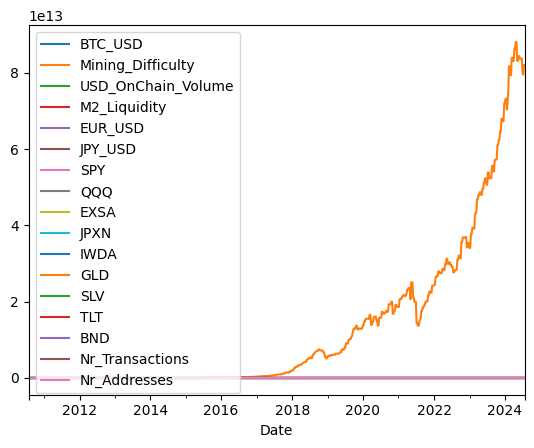

In [136]:
modify_df.plot.line()

# Normalize

In [137]:
normalized_df = modify_df.copy()
avgs = normalized_df.mean()
devs = normalized_df.std()

In [138]:
for column in normalized_df.columns:
    normalized_df[column] = (normalized_df[column] - avgs.loc[column]) / devs.loc[column]

In [139]:
normalized_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-07-30,-0.682839,-0.624173,NaN,NaN,1.027607,1.291800,-1.328407,-1.145317,-1.414593,-1.488775,-1.344785,-1.088154,-0.518652,-1.647232,-1.810919,-1.422945,-1.474215
2010-08-06,-0.682839,-0.624173,NaN,-1.410001,1.154038,1.340496,-1.315023,-1.138238,-1.386078,-1.433176,-1.346023,-1.002008,-0.439536,-1.649144,-1.768664,-1.422714,-1.474042
2010-08-13,-0.682839,-0.624173,NaN,-1.400463,0.841826,1.321080,-1.340781,-1.153440,-1.411425,-1.535109,-1.340079,-0.969016,-0.492818,-1.574359,-1.747122,-1.421645,-1.473366
2010-08-20,-0.682839,-0.624173,NaN,-1.399177,0.822408,1.380229,-1.345705,-1.151950,-1.443900,-1.512605,-1.345528,-0.923927,-0.517037,-1.446300,-1.724554,-1.422278,-1.473912
2010-08-27,-0.682839,-0.624173,NaN,-1.411287,0.732185,1.462751,-1.349935,-1.158284,-1.447068,-1.532461,-1.352710,-0.885802,-0.337816,-1.469862,-1.732760,-1.423156,-1.474400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,2.703174,3.415696,2.476662,1.470187,-1.042909,-1.889882,2.432973,2.568650,2.248398,1.904627,2.418753,2.560042,0.932875,-0.538977,0.693389,2.618539,0.556487
2024-07-05,2.496724,3.242235,5.764694,1.480006,-0.967539,-1.911288,2.518320,2.712968,2.309059,2.055578,2.425935,2.777057,1.241264,-0.485966,0.779848,1.914297,0.369321
2024-07-12,2.567866,3.213881,2.098960,NaN,-0.896954,-1.831674,2.562140,2.701625,2.393311,2.187766,2.475716,2.856972,1.183139,-0.417659,0.867671,3.056761,0.280228


<Axes: xlabel='Date'>

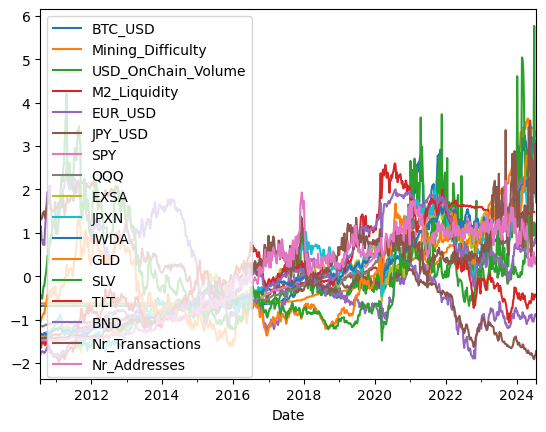

In [140]:
normalized_df.plot.line()

# Take First Difference to Remove Trend

In [141]:
differenced_df = normalized_df.copy()
differenced_df = differenced_df.diff()

In [148]:
differenced_df = differenced_df.loc[differenced_df.index[1]:]
differenced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-09-17,-9.542139e-08,0.000000e+00,1.352110e-06,0.002946,0.340184,-0.158444,0.010178,0.011196,-0.012674,-0.014561,-0.010402,0.103009,0.140470,-0.022262,0.020571,0.000007,-0.000069
2010-09-24,1.178735e-07,9.894863e-12,-1.176303e-06,-0.008556,0.216003,0.109772,0.014788,0.012475,0.007921,0.045009,-0.010650,0.078815,0.116251,0.062678,0.026748,0.000953,0.000712
2010-10-01,-1.290995e-08,1.935263e-11,3.970902e-07,-0.009959,0.269192,0.079221,-0.001333,-0.004855,-0.036437,0.000000,-0.020309,0.081381,0.103334,0.051380,0.034230,0.000565,0.000361
2010-10-08,1.396520e-06,0.000000e+00,2.300795e-06,0.020900,0.271719,0.102884,0.012250,0.005528,0.026931,0.090681,0.010897,0.100809,0.174377,-0.013407,0.047439,-0.001505,-0.000788
2010-10-15,1.018764e-06,2.865819e-12,-1.457488e-06,0.005283,0.127984,0.080704,0.007362,0.012997,0.025347,-0.009927,0.003715,0.074049,0.164689,-0.135794,-0.050534,-0.000238,-0.000184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,1.037433e-01,-3.209710e-02,-5.726756e-02,0.036680,0.052437,0.030592,0.054211,0.103524,0.072161,-0.021995,0.118384,-0.135634,-0.175992,0.067004,0.045137,-2.978317,-0.218158
2024-06-14,-1.865982e-01,3.996803e-15,-4.885108e-01,0.007013,-0.138240,-0.034816,0.071601,0.137158,-0.150983,-0.073732,0.048047,0.151397,0.054896,0.156409,0.141896,2.317135,0.027188
2024-06-21,-1.059060e-01,-1.998447e-03,-7.219149e-01,0.004231,-0.028805,-0.042974,0.028466,0.008366,0.044176,-0.098075,0.035664,-0.034825,-0.004844,-0.035032,-0.021135,-0.078330,0.140279


<Axes: xlabel='Date'>

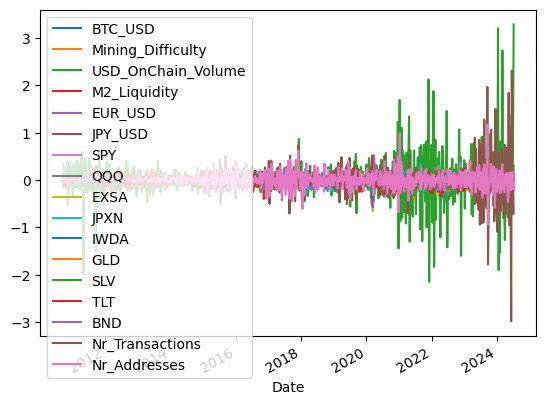

In [149]:
differenced_df.plot.line()

# Remove Increasing Volatility

In [168]:
annual_volatility = differenced_df.groupby(differenced_df.index.year).std()
annual_volatility

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010,0.000002,5.743143e-11,0.000003,0.009391,0.247495,0.090652,0.011136,0.006299,0.028208,0.053327,0.012812,0.098936,0.163113,0.056130,0.042931,0.022067,0.000868
2011,0.000135,5.438297e-09,0.001145,0.012876,0.193333,0.104371,0.023409,0.013163,0.059891,0.085192,0.024087,0.168947,0.446785,0.089140,0.040738,0.006601,0.008921
2012,0.000040,5.065285e-09,0.000521,0.014888,0.122498,0.078809,0.014749,0.009537,0.038401,0.055126,0.016557,0.115285,0.164569,0.094297,0.034194,0.054138,0.017716
2013,0.005939,2.597432e-06,0.023260,0.014270,0.119488,0.089772,0.014781,0.008851,0.040416,0.075732,0.020533,0.132407,0.141400,0.077649,0.049105,0.062743,0.042748
2014,0.005662,5.783573e-05,0.047222,0.012540,0.075704,0.063528,0.020552,0.012575,0.056462,0.076680,0.028725,0.083682,0.085978,0.063812,0.033452,0.045505,0.055118
2015,0.001346,1.225502e-04,0.010990,0.014265,0.148339,0.049652,0.027024,0.021345,0.080875,0.075102,0.045971,0.082300,0.079109,0.103901,0.051041,0.160845,0.120667
2016,0.002290,3.631809e-04,0.018604,0.013771,0.108477,0.098678,0.024659,0.018971,0.073721,0.084874,0.041265,0.098664,0.096078,0.100687,0.052211,0.154407,0.133947
2017,0.059792,3.256742e-03,0.163704,0.015392,0.094132,0.055183,0.013170,0.014747,0.038479,0.045047,0.022645,0.069044,0.069940,0.068072,0.036692,0.269077,0.234902
2018,0.056808,1.284535e-02,0.177470,0.016279,0.096898,0.048758,0.050612,0.040837,0.067006,0.110185,0.046792,0.052043,0.043661,0.064889,0.037629,0.135263,0.184179


In [171]:
vol_reduced_df = pd.DataFrame(index=differenced_df.index)

for column in differenced_df.columns:
    # Map each date to its corresponding annual volatility
    annual_vol_map = differenced_df.index.map(lambda d: annual_volatility.loc[d.year, column])
    
    # Divide the differenced data by the annual volatility
    vol_reduced_df[column] = differenced_df[column] / annual_vol_map

In [172]:
vol_reduced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-09-17,-0.050478,0.000000e+00,0.519028,0.313670,1.374509,-1.747822,0.913987,1.777291,-0.449312,-0.273054,-0.811870,1.041160,0.861184,-0.396617,0.479166,0.000309,-0.079070
2010-09-24,0.062355,1.722900e-01,-0.451542,-0.911137,0.872758,1.210914,1.328003,1.980251,0.280815,0.844022,-0.831197,0.796618,0.712703,1.116645,0.623058,0.043190,0.819836
2010-10-01,-0.006829,3.369693e-01,0.152429,-1.060504,1.087666,0.873905,-0.119702,-0.770755,-1.291711,0.000000,-1.585072,0.822555,0.633514,0.915373,0.797342,0.025606,0.416160
2010-10-08,0.738754,0.000000e+00,0.883195,2.225565,1.097877,1.134936,1.100019,0.877461,0.954710,1.700490,0.850531,1.018930,1.069055,-0.238857,1.105018,-0.068179,-0.907230
2010-10-15,0.538922,4.989983e-02,-0.559479,0.562615,0.517118,0.890257,0.661159,2.063246,0.898578,-0.186156,0.289948,0.748446,1.009664,-2.419259,-1.177098,-0.010798,-0.212242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,0.473876,-2.865506e-01,-0.044095,1.610201,0.788706,0.732987,0.985995,1.256188,0.991507,-0.184053,2.127594,-0.900481,-1.059890,0.811037,0.565569,-3.006043,-1.095658
2024-06-14,-0.852339,3.568192e-14,-0.376147,0.307878,-2.079283,-0.834189,1.302288,1.664322,-2.074538,-0.616970,0.863502,1.005130,0.330608,1.893212,1.777956,2.338705,0.136547
2024-06-21,-0.483754,-1.784137e-02,-0.555866,0.185753,-0.433262,-1.029658,0.517738,0.101521,0.606988,-0.820667,0.640950,-0.231204,-0.029172,-0.424033,-0.264817,-0.079059,0.704524


<Axes: xlabel='Date'>

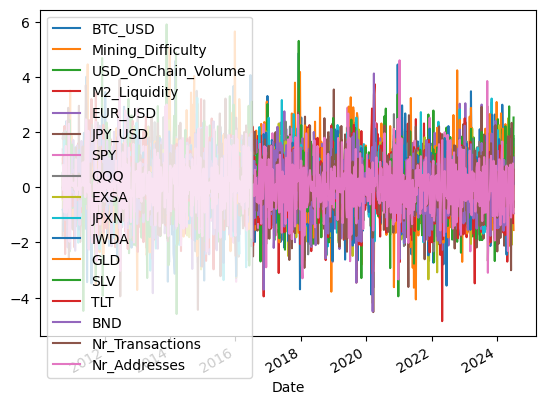

In [173]:
vol_reduced_df.plot.line()

# Remove Seasonality

In [177]:
month_avgs = vol_reduced_df.groupby(vol_reduced_df.index.month).mean()
month_avgs

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
1,-0.057778,0.331237,0.019595,-0.297415,-0.048013,0.043946,0.206877,0.239697,0.188078,0.153228,0.203494,0.281023,0.183963,0.049641,0.167006,-0.042598,0.019214
2,0.053569,0.370339,-0.032374,0.227962,-0.012982,-0.123514,0.301027,0.218720,0.135682,0.146356,0.231287,0.069573,0.022258,-0.154034,-0.109358,0.082859,0.067908
3,0.077420,0.175396,0.003387,0.540572,-0.085541,-0.126308,0.163362,0.139168,0.100978,0.058028,0.148037,0.064051,-0.050732,0.069661,0.038498,-0.062970,0.012543
4,0.058505,0.246798,-0.026157,0.158896,0.054532,-0.166076,0.164177,0.146396,0.240682,-0.070768,0.115140,0.106379,-0.004479,0.003647,0.163116,0.189959,0.132131
5,0.021245,0.229019,0.092914,-0.037904,-0.132479,-0.071875,0.084790,0.139423,0.108702,-0.022055,0.078569,-0.145170,-0.113114,0.020551,0.140057,-0.059266,-0.076301
6,0.169092,0.284818,-0.012372,0.219800,0.042868,-0.048092,0.154315,0.128778,-0.184451,0.142360,0.061048,-0.037566,-0.112788,0.063312,0.092767,0.095331,0.138336
7,0.094879,0.154689,-0.030078,0.205036,-0.004309,0.135512,0.438651,0.519211,0.261863,0.146977,0.334036,0.148074,0.196652,0.193175,0.350275,-0.033388,-0.050691
8,-0.108695,0.558576,0.018530,0.328895,-0.066078,0.036296,-0.139094,-0.000505,-0.185311,-0.211524,-0.102926,0.161915,0.057143,0.129394,0.156924,0.048307,-0.004977
9,-0.048428,0.661864,0.001074,0.114569,-0.148533,-0.243412,0.029861,0.039331,0.005799,0.191018,0.000692,-0.279700,-0.251341,-0.186429,-0.146767,0.005420,0.083444


In [178]:
unseasoned_df = pd.DataFrame(index=vol_reduced_df.index)

for column in vol_reduced_df.columns:
    # Map each date to its corresponding monthly average
    monthly_avg = vol_reduced_df.index.map(lambda d: month_avgs.loc[d.month, column])
    
    # Divide the differenced data by the annual volatility
    unseasoned_df[column] = vol_reduced_df[column] - monthly_avg

In [179]:
unseasoned_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-09-17,-0.002049,-0.661864,0.517953,0.199101,1.523042,-1.504410,0.884126,1.737960,-0.455110,-0.464072,-0.812562,1.320860,1.112525,-0.210188,0.625933,-0.005111,-0.162514
2010-09-24,0.110783,-0.489574,-0.452616,-1.025706,1.021291,1.454326,1.298142,1.940921,0.275017,0.653004,-0.831889,1.076319,0.964043,1.303074,0.769825,0.037771,0.736392
2010-10-01,-0.295496,-0.068924,-0.035646,-1.324378,1.080400,1.004171,-0.385652,-1.019873,-1.398132,-0.048477,-1.737272,0.696870,0.544979,1.137625,0.839847,-0.016058,0.393832
2010-10-08,0.450087,-0.405893,0.695120,1.961691,1.090610,1.265202,0.834069,0.628343,0.848290,1.652013,0.698332,0.893245,0.980521,-0.016605,1.147523,-0.109842,-0.929557
2010-10-15,0.250255,-0.355993,-0.747554,0.298741,0.509851,1.020523,0.395210,1.814128,0.792157,-0.234633,0.137748,0.622762,0.921129,-2.197007,-1.134593,-0.052461,-0.234570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,0.304784,-0.571368,-0.031723,1.390401,0.745838,0.781080,0.831680,1.127410,1.175958,-0.326413,2.066546,-0.862915,-0.947102,0.747725,0.472802,-3.101374,-1.233995
2024-06-14,-1.021431,-0.284818,-0.363775,0.088078,-2.122151,-0.786096,1.147973,1.535544,-1.890088,-0.759330,0.802454,1.042696,0.443396,1.829900,1.685189,2.243374,-0.001789
2024-06-21,-0.652847,-0.302659,-0.543493,-0.034047,-0.476129,-0.981565,0.363424,-0.027257,0.791439,-0.963027,0.579902,-0.193638,0.083616,-0.487345,-0.357584,-0.174390,0.566188


<Axes: xlabel='Date'>

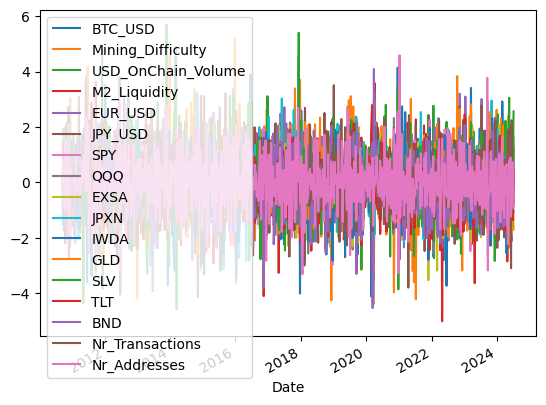

In [180]:
unseasoned_df.plot.line()

In [182]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}

# Loop through each column in the DataFrame
for column in unseasoned_df.columns:
    # Perform ADF test
    result = adfuller(unseasoned_df[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       pass
    else:
        print(f"{column}")

In [183]:
p_values

{'BTC_USD': 0.0,
 'Mining_Difficulty': 2.885115325600716e-10,
 'USD_OnChain_Volume': 1.5961497119596055e-28,
 'M2_Liquidity': 0.000169990403183474,
 'EUR_USD': 0.0,
 'JPY_USD': 0.0,
 'SPY': 0.0,
 'QQQ': 0.0,
 'EXSA': 0.0,
 'JPXN': 0.0,
 'IWDA': 1.6992154608030932e-29,
 'GLD': 9.604800352044049e-30,
 'SLV': 0.0,
 'TLT': 7.402603943210517e-23,
 'BND': 0.0,
 'Nr_Transactions': 2.0901858785802554e-29,
 'Nr_Addresses': 4.675329942929258e-13}